In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime
import matplotlib
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

places_df = pd.read_csv('data/clean_mobility_data.csv')


In [2]:
us_df = places_df[(places_df['sub_region_1'].isnull()) & (places_df['sub_region_2'].isnull())]

In [3]:
us_df.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'Retail and Recreation', 'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy', 
                        'parks_percent_change_from_baseline' : 'Parks', 'transit_stations_percent_change_from_baseline': 'Transit', 
                        'workplaces_percent_change_from_baseline' : 'Workplaces', 'residential_percent_change_from_baseline': 'Residential'
                       })

,Unnamed: 0,sub_region_1,sub_region_2,date,Retail and Recreation,Grocery and Pharmacy,Parks,Transit,Workplaces,Residential
0,0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
812175,110,NaN,NaN,2021-04-21,-9.0,-3.0,6.0,-29.0,-29.0,8.0
812176,111,NaN,NaN,2021-04-22,-9.0,-2.0,16.0,-28.0,-28.0,8.0
812177,112,NaN,NaN,2021-04-23,-11.0,-5.0,16.0,-25.0,-28.0,7.0
812178,113,NaN,NaN,2021-04-24,-9.0,-2.0,34.0,-18.0,-12.0,2.0


In [4]:
date = us_df['date']
date

0         2020-02-15
1         2020-02-16
2         2020-02-17
3         2020-02-18
4         2020-02-19
             ...    
812175    2021-04-21
812176    2021-04-22
812177    2021-04-23
812178    2021-04-24
812179    2021-04-25
Name: date, Length: 436, dtype: object

In [5]:
date2 = pd.to_datetime(date, format="%Y/%m/%d")
date2

0        2020-02-15
1        2020-02-16
2        2020-02-17
3        2020-02-18
4        2020-02-19
            ...    
812175   2021-04-21
812176   2021-04-22
812177   2021-04-23
812178   2021-04-24
812179   2021-04-25
Name: date, Length: 436, dtype: datetime64[ns]

In [15]:
plt.rcParams["figure.figsize"] = [16,9]

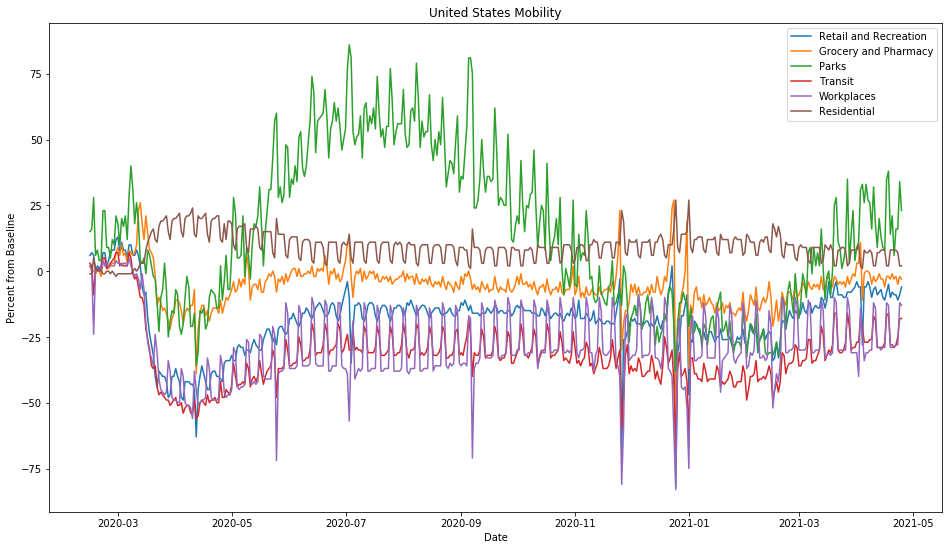

In [24]:
categories =['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 
             'residential_percent_change_from_baseline']
#categories =[ 'Retail and Recreation', 'Grocery and Pharmacy', 'Parks', 'Transit', 'Workplaces', 'Residential']
for category in categories:
        plt.plot(date2, us_df[category], label=category)

        
def x_axis_dates(ax=None, fig=None):
   
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()
    

    
mylabels =[ 'Retail and Recreation', 'Grocery and Pharmacy', 'Parks', 'Transit', 'Workplaces', 'Residential']    
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Percent from Baseline')
# Set a title of the current axes.
plt.title('United States Mobility')
# show a legend on the plot
plt.legend(mylabels, loc='best')
x_axis_dates

plt.savefig('Univted States Mobility')

plt.show()
